### Name: Riya Shyam Huddar
### Roll no.: MDS202431
### ADA Assignment 3

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [7]:
#load the dataset
file_path = r"D:\CMI\ADA\Assignment_3\netflow.csv"  
df = pd.read_csv(file_path)


### Exploratory Data Analysis

### Dataset Sample and Description

The dataset consists of **network flow records** with various statistical features and labels indicating whether a flow is benign or malicious.

| Column | Description |
|--------|-------------|
| `IPV4_SRC_ADDR` | Source IPv4 address of the flow |
| `L4_SRC_PORT` | Source transport-layer port |
| `IPV4_DST_ADDR` | Destination IPv4 address of the flow |
| `L4_DST_PORT` | Destination transport-layer port |
| `PROTOCOL` | Transport protocol (e.g., TCP=6, UDP=17) |
| `L7_PROTO` | Application layer protocol identifier  |
| `IN_BYTES` | Number of bytes sent from source to destination |
| `OUT_BYTES` | Number of bytes sent from destination to source |
| `IN_PKTS` | Number of packets sent from source to destination |
| `OUT_PKTS` | Number of packets sent from destination to source |
| `TCP_FLAGS` | TCP flags value representing control information |
| `FLOW_DURATION_MILLISECONDS` | Duration of the flow in milliseconds |
| `Label` | 0 = Benign, 1 = Malicious |
| `Attack` | Type of attack if flow is malicious (e.g., Exploits, DoS) |


**Notes:**
- Each row represents a **network flow** between a source and a destination.
- The dataset includes both **benign and malicious flows**.
- Features like `IN_BYTES`, `OUT_BYTES`, `IN_PKTS`, `OUT_PKTS`, and `FLOW_DURATION_MILLISECONDS` will be used for **traffic classification and malware detection**.


In [9]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


> There are **1623118** entries in the data with numeric and object features.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623118 entries, 0 to 1623117
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1623118 non-null  object 
 1   L4_SRC_PORT                 1623118 non-null  int64  
 2   IPV4_DST_ADDR               1623118 non-null  object 
 3   L4_DST_PORT                 1623118 non-null  int64  
 4   PROTOCOL                    1623118 non-null  int64  
 5   L7_PROTO                    1623118 non-null  float64
 6   IN_BYTES                    1623118 non-null  int64  
 7   OUT_BYTES                   1623118 non-null  int64  
 8   IN_PKTS                     1623118 non-null  int64  
 9   OUT_PKTS                    1623118 non-null  int64  
 10  TCP_FLAGS                   1623118 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1623118 non-null  int64  
 12  Label                       1623118 non-null  int64  
 1

### Statistical Summary
### Key Observations:
- Most flows are **benign**, as indicated by the low mean of `Label` (~0.045).
- `IN_BYTES` and `OUT_BYTES` are heavily skewed, with maximum values much higher than the 75th percentile → presence of **large flows/outliers**.
- `L4_SRC_PORT` and `L4_DST_PORT` cover the **full port range (0–65535)**.
- `FLOW_DURATION_MILLISECONDS` varies widely, suggesting a mix of short and long-lived flows.
- `PROTOCOL` and `L7_PROTO` have discrete values, indicating **categorical protocol types**.
- Packet counts (`IN_PKTS`, `OUT_PKTS`) and `TCP_FLAGS` also have wide variation, which may help differentiate traffic types.

**Conclusion:**  
The dataset is highly imbalanced and contains extreme values. Features such as bytes, packets, and flow duration will require **scaling or careful handling** before modeling. Protocol and port information could be useful categorical predictors.


In [13]:
df.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06,1.623118e+06
mean,3.264150e+04,1.381955e+04,9.890804e+00,1.365581e+01,5.336064e+03,4.273129e+04,3.953901e+01,5.078661e+01,1.906669e+01,5.515161e+04,4.460920e-02
std,1.919783e+04,1.959370e+04,1.252321e+01,2.062080e+01,7.841119e+04,1.754205e+05,8.883628e+01,1.315082e+02,1.206588e+01,4.811634e+05,2.064443e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.591600e+04,5.300000e+01,6.000000e+00,0.000000e+00,5.200000e+02,3.040000e+02,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.267500e+04,2.627000e+03,6.000000e+00,5.000000e+00,1.920000e+03,3.276000e+03,1.600000e+01,1.800000e+01,2.700000e+01,7.000000e+00,0.000000e+00
75%,4.934800e+04,2.455900e+04,1.700000e+01,1.300000e+01,3.806000e+03,2.100600e+04,5.000000e+01,4.800000e+01,2.700000e+01,1.660000e+02,0.000000e+00
max,6.553500e+04,6.553500e+04,2.550000e+02,2.490000e+02,2.685425e+07,1.465675e+07,2.003800e+04,1.102400e+04,3.100000e+01,4.294952e+06,1.000000e+00


> There are **no missing or NULL** values

In [15]:
print(df.isnull().sum())

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64


In [17]:
df.nunique()

IPV4_SRC_ADDR                    40
L4_SRC_PORT                   64586
IPV4_DST_ADDR                    40
L4_DST_PORT                   64610
PROTOCOL                        255
L7_PROTO                        265
IN_BYTES                      12256
OUT_BYTES                     16047
IN_PKTS                         892
OUT_PKTS                       1207
TCP_FLAGS                        15
FLOW_DURATION_MILLISECONDS    17377
Label                             2
Attack                           10
dtype: int64

> Total number of unique flows in the dataset **1580168** , there are **42950** duplicate records.

In [15]:
num_unique_flows = df[['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL']].drop_duplicates().shape[0]
print("Number of unique flows:", num_unique_flows)

Number of unique flows: 1580168


In [17]:
duplicate_flows = df.duplicated(subset=['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL'])
print("Number of duplicate flow records:", duplicate_flows.sum())

Number of duplicate flow records: 42950


In [19]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

### Handling Duplicate Flows and Aggregation

1. **Drop exact duplicate rows:**  
   We first remove rows where all columns are identical to ensure no exact duplicates remain in the dataset.

2. **Define flow key (5-tuple):**  
   Each flow is uniquely identified by the combination of `IPV4_SRC_ADDR`, `IPV4_DST_ADDR`, `L4_SRC_PORT`, `L4_DST_PORT`, and `PROTOCOL`.

3. **Check duplicate flows:**  
   Before aggregation, we count how many rows share the same flow key, indicating multiple records for the same flow.

4. **Aggregate numeric and categorical features per flow:**  
   - **Volume metrics (`IN_BYTES`, `OUT_BYTES`, `IN_PKTS`, `OUT_PKTS`)** are summed across duplicates.  
   - **Flow duration (`FLOW_DURATION_MILLISECONDS`)** takes the maximum observed value.  
   - **TCP flags (`TCP_FLAGS`)** take the maximum value.  
   - **Categorical columns (`L7_PROTO`)** take the most frequent (mode) value.  
   - **Label** is marked as attack if any fragment of the flow is malicious.  
   - **Attack type** takes the most frequent attack label within the flow.  

5. **Resulting dataset:**  
   After aggregation, each row corresponds to a unique flow with consolidated statistics, reducing redundancy while preserving the key information of each flow.


In [19]:
from collections import Counter

# drop exact identical rows (all columns identical)
exact_dup_count = df.duplicated().sum()
print("Exact duplicate rows:", exact_dup_count)
if exact_dup_count > 0:
    df = df.drop_duplicates()
    print("Dropped exact duplicates. New shape:", df.shape)

# define flow-identifying columns (5-tuple)
flow_key = ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL']

# Count how many rows share the same flow key (before grouping)
dupe_flow_count = df.duplicated(subset=flow_key).sum()
print("Rows that share the same flow key (duplicates by flow id):", dupe_flow_count)

# aggregation dictionary for numeric and other columns
agg_dict = {
    # sums for volume
    'IN_BYTES': 'sum',
    'OUT_BYTES': 'sum',
    'IN_PKTS': 'sum',
    'OUT_PKTS': 'sum',
    # duration => take maximum observed duration for the flow
    'FLOW_DURATION_MILLISECONDS': 'max',
    # flags => max 
    'TCP_FLAGS': 'max',
    # categorical: take mode or  first non-null
    'L7_PROTO': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'Label': 'max',
    # Attack: take mode (most frequent attack label within the flow); handle NaNs
    'Attack': lambda x: x.mode().iloc[0] if not x.mode().empty else x.dropna().iloc[0] if x.dropna().size>0 else None
}

# perform aggregation
df_agg = df.groupby(flow_key, as_index=False).agg(agg_dict)

# sanity checks: counts before/after
print("Original rows:", df.shape[0])
print("Rows after aggregation (unique flows):", df_agg.shape[0])

Exact duplicate rows: 19740
Dropped exact duplicates. New shape: (1603378, 14)
Rows that share the same flow key (duplicates by flow id): 23210
Original rows: 1603378
Rows after aggregation (unique flows): 1580168


### Class Distribution: Imbalanced Dataset

The dataset is highly imbalanced:

- **Benign flows (Label 0):** 1,519,637  
- **Malicious flows (Label 1):** 60,531  

This means that only about 3.8% of flows are attacks, while the vast majority are benign.  
Such imbalance can bias models toward predicting the majority class


In [26]:
# Value counts for Label
print("\nLabel counts:\n", df_agg['Label'].value_counts())


Label counts:
 Label
0    1519637
1      60531
Name: count, dtype: int64


> Observation: Most attack types are heavily underrepresented compared to benign flows, highlighting severe class imbalance even within the malicious class.

In [28]:
# Value counts for Attack
print("\nAttack counts:\n", df_agg['Attack'].value_counts())


Attack counts:
 Attack
Benign            1519637
Exploits            22837
Fuzzers             16888
Reconnaissance      10470
Generic              3338
DoS                  3264
Analysis             1853
Shellcode            1365
Backdoor              374
Worms                 142
Name: count, dtype: int64


### Distribution of Malicious Attack Types (Excluding Benign)

A pie chart showing the proportion of different attack types among only the malicious flows:

- **Exploits:** ~37.7%  
- **Fuzzers:** ~27.9%  
- **Reconnaissance:** ~17.3%
- **DoS, Analysis, Shellcode, Backdoor, Worms:** minor proportions, with **Worms** being almost negligible (~0.2%)  

> Observation: A few attack types (Exploits, Fuzzers, Reconnaissance) dominate the malicious traffic, while others are very sparse. This imbalance needs to be considered in modeling.


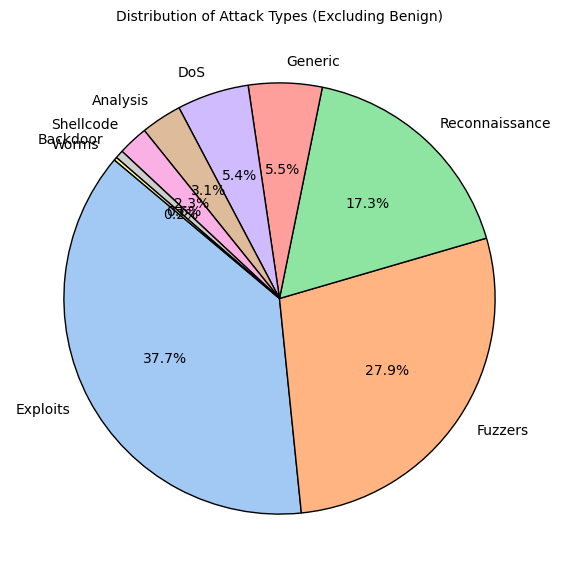

In [30]:
# Filter out benign flows
attack_only = df_agg[df_agg['Attack'] != "Benign"]  

# Count of each attack type
attack_counts = attack_only['Attack'].value_counts()

palette = sns.color_palette("pastel", n_colors=len(attack_counts))  

# Pie chart
plt.figure(figsize=(9,7))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140,
        colors=palette, wedgeprops={'edgecolor':'black'})
plt.title('Distribution of Attack Types (Excluding Benign)', fontsize=10)
plt.show()


### Average Packets per Flow by Label

Instead of total counts, we compute the **average number of packets per flow** for each label:

- **Label 0 (Benign):** Average packets per flow are moderately high.  
- **Label 1 (Malicious):** Although there are fewer flows, attack flows have **comparable average packets per flow**, indicating that malicious traffic can generate substantial packets per flow.

> **Insight:** Using averages rather than totals gives a fairer perspective on traffic behavior, highlighting that individual attack flows can be quite significant despite the class imbalance.


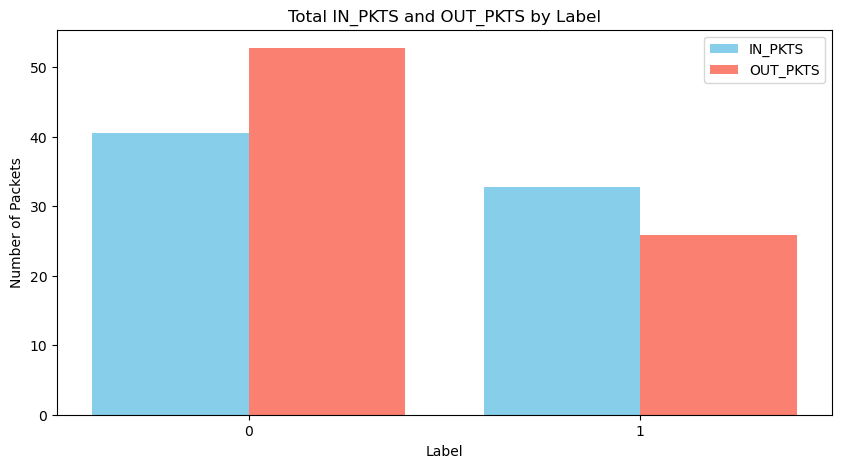

In [32]:
# Sum of packets per label
in_pkts_sum = df_agg.groupby('Label')['IN_PKTS'].mean()
out_pkts_sum = df_agg.groupby('Label')['OUT_PKTS'].mean()

# Side-by-side bar chart
labels = ['0', '1']
x = range(len(labels))

plt.figure(figsize=(10,5))
plt.bar([i-0.2 for i in x], in_pkts_sum, width=0.4, label='IN_PKTS', color='skyblue')
plt.bar([i+0.2 for i in x], out_pkts_sum, width=0.4, label='OUT_PKTS', color='salmon')

plt.xticks(x, labels)
plt.xlabel("Label")
plt.ylabel("Number of Packets")
plt.title("Total IN_PKTS and OUT_PKTS by Label")
plt.legend()
plt.show()


### Average Flow Duration by Label

A bar chart showing the **average flow duration** for each label:

- **Label 0 (Benign):** Normal flows have longer durations on average.  
- **Label 1 (Malicious):** Malicious flows tend to have much shorter durations, suggesting that attacks are often **quick bursts of traffic** rather than prolonged flows.

> **Insight:** Flow duration is a useful feature for distinguishing benign vs. attack traffic in this dataset.


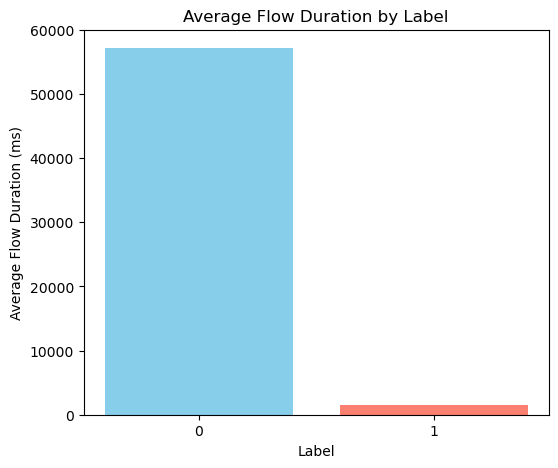

In [34]:
# Average flow duration per label
flow_duration_avg = df_agg.groupby('Label')['FLOW_DURATION_MILLISECONDS'].mean()

# Bar chart
labels = ['0', '1']
x = range(len(labels))

plt.figure(figsize=(6,5))
plt.bar(x, flow_duration_avg, color=['skyblue', 'salmon'])
plt.xticks(x, labels)
plt.xlabel("Label")
plt.ylabel("Average Flow Duration (ms)")
plt.title("Average Flow Duration by Label")
plt.show()


### Average Packets per Attack Type

The bar chart displays the **average number of incoming (IN_PKTS)** and **outgoing packets (OUT_PKTS)** for each type of malicious attack:

- For attacks like **DoS, Generic, and Worms**, the average incoming packets are **lower than outgoing packets**.  
- Specifically, for **Worms**, the outgoing packets are moderately higher than the incoming ones.  

> This analysis highlights differences in traffic patterns across attack types, which can be useful for feature-based classification or anomaly detection.


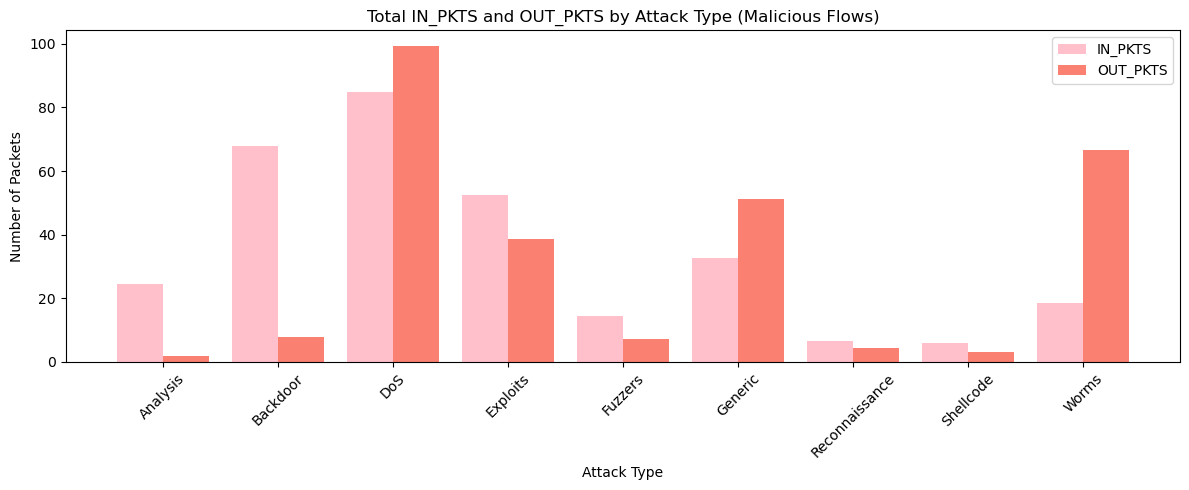

In [36]:
# Sum of packets per attack type
in_pkts_sum = attack_only.groupby('Attack')['IN_PKTS'].mean()
out_pkts_sum = attack_only.groupby('Attack')['OUT_PKTS'].mean()

# Side-by-side bar chart
attacks = in_pkts_sum.index
x = range(len(attacks))

plt.figure(figsize=(12,5))
plt.bar([i-0.2 for i in x], in_pkts_sum, width=0.4, label='IN_PKTS', color='pink')
plt.bar([i+0.2 for i in x], out_pkts_sum, width=0.4, label='OUT_PKTS', color='salmon')

plt.xticks(x, attacks, rotation=45)
plt.xlabel("Attack Type")
plt.ylabel("Number of Packets")
plt.title("Total IN_PKTS and OUT_PKTS by Attack Type (Malicious Flows)")
plt.legend()
plt.tight_layout()
plt.show()


### Average Flow Duration per Attack Type

The bar chart shows the **average flow duration** for each type of malicious attack:

- **Backdoor** flows have a **moderately higher duration** compared to other attacks.  
- **Shellcode** flows have the **shortest duration**, indicating very brief connections.  

> Differences in flow duration across attack types can help distinguish certain attacks and support traffic classification models.


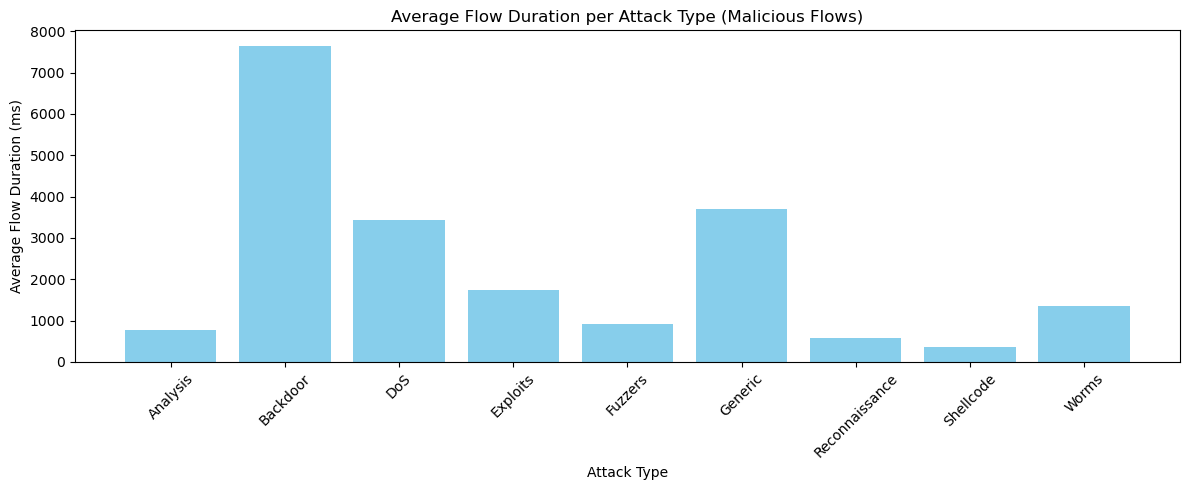

In [38]:
# Average flow duration per attack
flow_duration_mean = attack_only.groupby('Attack')['FLOW_DURATION_MILLISECONDS'].mean()

# Bar chart
attacks = flow_duration_mean.index
x = range(len(attacks))

plt.figure(figsize=(12,5))
plt.bar(x, flow_duration_mean, color='skyblue')

plt.xticks(x, attacks, rotation=45)
plt.xlabel("Attack Type")
plt.ylabel("Average Flow Duration (ms)")
plt.title("Average Flow Duration per Attack Type (Malicious Flows)")
plt.tight_layout()
plt.show()


### Correlation Analysis of Numeric Features

A heatmap of numeric features including the **Label** shows relationships between traffic metrics:

- **OUT_BYTES** and **OUT_PKTS** are **highly correlated (0.97)**, as expected since more packets usually carry more bytes.  
- **IN_BYTES** and **IN_PKTS** have a **moderate correlation (0.71)**.  
- **PROTOCOL** and **TCP_FLAGS** show a **moderately strong negative correlation (-0.76)**, reflecting that certain protocols do not use TCP flags.  

These correlation patterns can guide **feature selection** and highlight potential **redundancies** in the dataset.


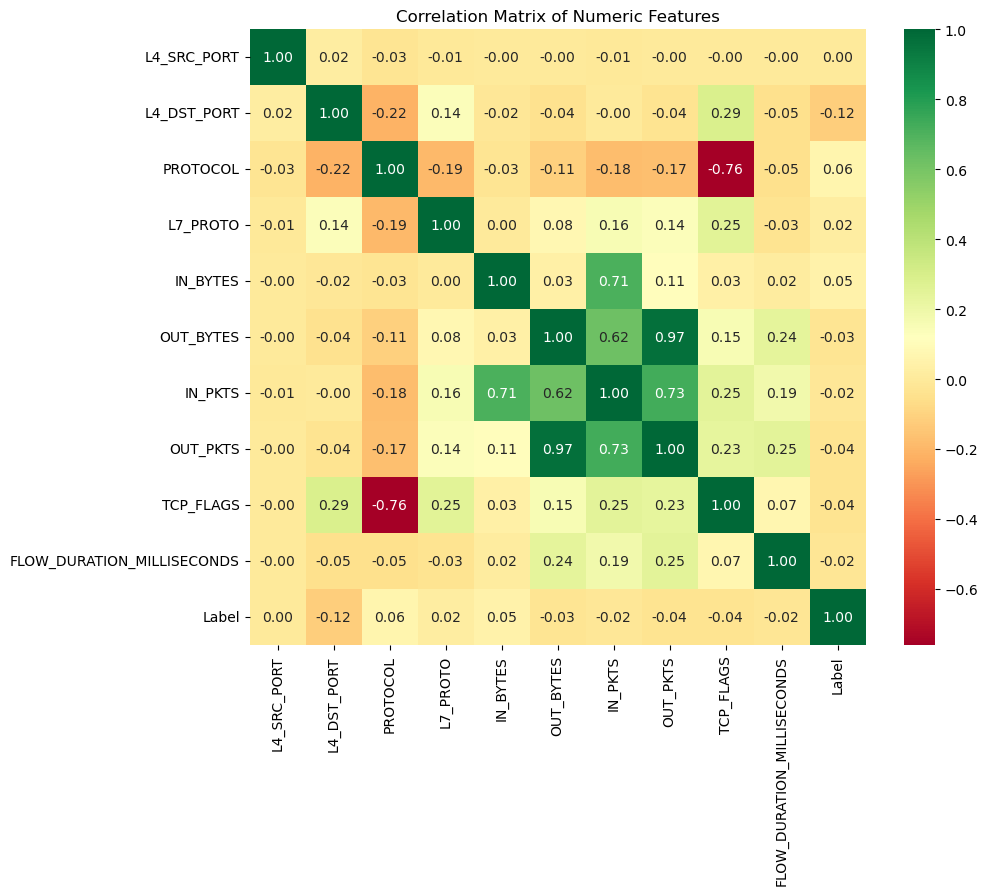

In [40]:
# Select numeric columns including Label
numeric_cols = ['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO',
                'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
                'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label']

# Compute correlation matrix
corr = df_agg[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### Derived Features and Attack Summary

We compute additional flow-level features to better capture traffic characteristics:

- **TOTAL_BYTES / TOTAL_PKTS:** Overall bytes and packets per flow.  
- **BYTE_RATIO / PKT_RATIO:** Ratio of incoming to outgoing traffic, highlighting directional imbalance.


### Attack Type Summary (Mean Values)

This table summarizes the **average flow statistics** for each attack type (malicious flows only):

- **Packet Counts (IN_PKTS / OUT_PKTS):**  
  - DoS and Worms have higher **OUT_PKTS** than **IN_PKTS**, indicating outbound-heavy attacks.  
  - Backdoor flows have moderate counts but a very high **PKT_RATIO** (~60), meaning inbound dominates.

- **Flow Duration:**  
  - Backdoor flows last longer on average (~7.6k ms).  
  - Shellcode and Reconnaissance are very short (~370–570 ms).

- **Bytes (IN_BYTES / OUT_BYTES / TOTAL_BYTES):**  
  - DoS and Worms have high outbound byte counts.  
  - Backdoor flows have moderate total bytes but high **BYTE_RATIO**, showing mostly inbound traffic.

- **Ratios (BYTE_RATIO / PKT_RATIO):**  
  - Reveal attack patterns: Backdoor and Analysis are inbound-heavy, DoS and Worms are outbound-heavy.

> Different attacks show distinct flow patterns in duration, volume, and directionality—useful for feature-based detection.


Attack Type Summary (Mean Values):
                IN_PKTS  OUT_PKTS  FLOW_DURATION_MILLISECONDS  IN_BYTES  \
Attack                                                                    
Analysis          24.57      1.94                      781.91   3486.73   
Backdoor          67.71      7.82                     7641.44  11092.40   
DoS               84.73     99.24                     3423.37  72594.38   
Exploits          52.41     38.76                     1732.27  48966.02   
Fuzzers           14.56      7.11                      925.24   7865.14   
Generic           32.56     51.11                     3696.15  13232.57   
Reconnaissance     6.71      4.45                      574.40    448.46   
Shellcode          5.97      3.29                      369.64    526.48   
Worms             18.44     66.62                     1358.29   1825.52   

                OUT_BYTES  TOTAL_BYTES  TOTAL_PKTS  BYTE_RATIO  PKT_RATIO  
Attack                                                         

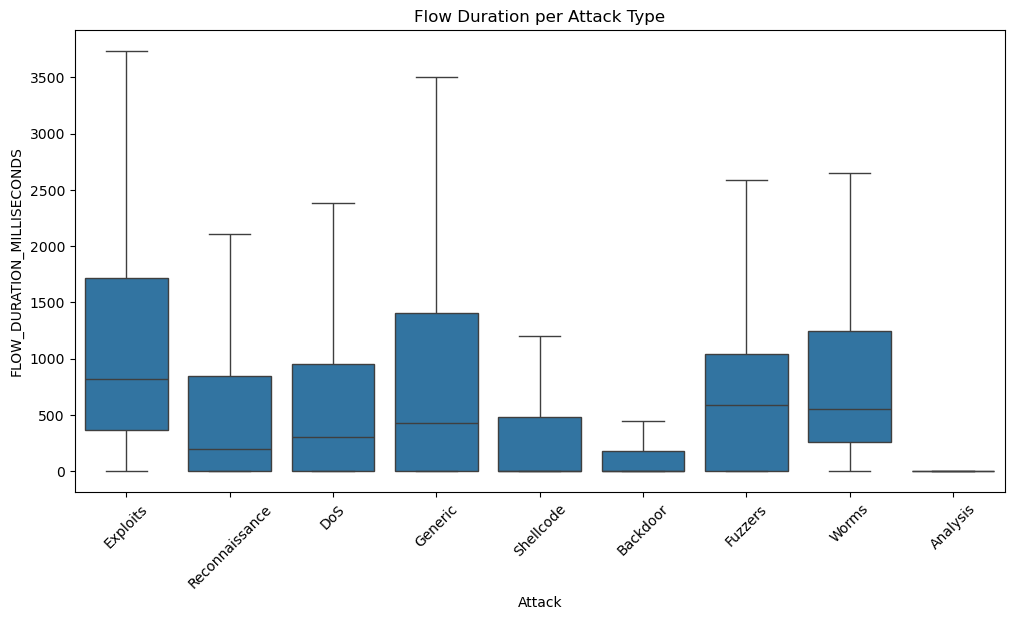

In [42]:
#  Derived features 
df_agg['TOTAL_BYTES'] = df_agg['IN_BYTES'] + df_agg['OUT_BYTES']
df_agg['TOTAL_PKTS'] = df_agg['IN_PKTS'] + df_agg['OUT_PKTS']
df_agg['BYTE_RATIO'] = df_agg['IN_BYTES'] / (df_agg['OUT_BYTES'] + 1)  # avoid divide by zero
df_agg['PKT_RATIO'] = df_agg['IN_PKTS'] / (df_agg['OUT_PKTS'] + 1)

# Group by Attack and compute mean
attack_summary = df_agg[df_agg['Label']==1].groupby('Attack')[
    ['IN_PKTS','OUT_PKTS','FLOW_DURATION_MILLISECONDS','IN_BYTES','OUT_BYTES','TOTAL_BYTES','TOTAL_PKTS','BYTE_RATIO','PKT_RATIO']
].mean().round(2)

print("Attack Type Summary (Mean Values):")
print(attack_summary)

# visualization
plt.figure(figsize=(12,6))
sns.boxplot(x='Attack', y='FLOW_DURATION_MILLISECONDS', data=df[df['Label']==1], showfliers=False)
plt.xticks(rotation=45)
plt.title('Flow Duration per Attack Type')
plt.show()


----

### Modeling

### Binary Classification using Random Forest

We use the existing `Label` column as the binary target variable and drop the multi-class `Attack` column.  
A Random Forest classifier is trained on the scaled features to evaluate binary classification performance.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prepare binary classification dataset
# Drop 'Attack' (multi-class info) and IP address columns
df_binary = df_agg.drop(columns=['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'])
#print("Columns used for binary modeling:", df_binary.columns.tolist())

# Define features and target
X_binary = df_binary.drop(columns=['Label'])
y_binary = df_binary['Label']

# Train-test split (stratified for balanced class distribution)
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)


# Train Random Forest Classifier for Binary Classification
rf_clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train_binary, y_train_binary)

# Predictions
y_pred_binary = rf_clf.predict(X_test_binary)
y_proba_binary = rf_clf.predict_proba(X_test_binary)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_binary))
print("ROC-AUC Score:", roc_auc_score(y_test_binary, y_proba_binary))


Confusion Matrix:
 [[302373   1555]
 [  1744  10362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    303928
           1       0.87      0.86      0.86     12106

    accuracy                           0.99    316034
   macro avg       0.93      0.93      0.93    316034
weighted avg       0.99      0.99      0.99    316034

ROC-AUC Score: 0.9940031863509735


### Multiclass Classification

In [77]:
# Drop features that should not be used
df_model = df_agg.drop(columns=['Label', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'])

print("Columns used for modeling:", df_model.columns.tolist())


Columns used for modeling: ['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'FLOW_DURATION_MILLISECONDS', 'TCP_FLAGS', 'L7_PROTO', 'Attack', 'TOTAL_BYTES', 'TOTAL_PKTS', 'BYTE_RATIO', 'PKT_RATIO']


### Handling Rare Attack Classes

To avoid class imbalance issues and improve model generalization, we group infrequent attack categories into a single `"Others"` class.

- We define a **threshold of 2000 samples** — any attack type with fewer than 2000 instances is considered *rare*.  
- All such rare attack types are merged into the `"Others"` category.  
- This helps ensure that each class has a sufficient number of samples for meaningful learning and evaluation.


In [79]:
# Set threshold: attacks with fewer than 2000 samples will go into 'Others'
threshold = 2000
attack_counts = df_model['Attack'].value_counts()

# Map small attack classes to 'Others'
rare_attacks = attack_counts[attack_counts < threshold].index
df_model['Attack'] = df_model['Attack'].replace(rare_attacks, 'Others')

# Check new counts
print(df_model['Attack'].value_counts())


Attack
Benign            1519637
Exploits            22837
Fuzzers             16888
Reconnaissance      10470
Others               3734
Generic              3338
DoS                  3264
Name: count, dtype: int64


### Encode Attack Labels for Multiclass Classification

In this step, we prepare the dataset for **multiclass classification** by converting the categorical `Attack` column into numerical labels using `LabelEncoder`.  
Each unique attack type is assigned an integer value, which will serve as the target variable (`Attack_Label`) for model training.

**Steps performed:**
1. Initialize and fit a `LabelEncoder` on the `Attack` column.  
2. Create a new encoded column `Attack_Label` representing each attack as an integer.  
3. Print the mapping between attack names and their encoded labels for reference.  
4. Define:
   - `X`: Feature matrix (all columns except `Attack` and `Attack_Label`)  
   - `y`: Target vector (`Attack_Label`)  

In [83]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le_attack = LabelEncoder()

# Fit and transform the target
df_model['Attack_Label'] = le_attack.fit_transform(df_model['Attack'])

# Check mapping
attack_mapping = dict(zip(le_attack.classes_, le_attack.transform(le_attack.classes_)))
print("Attack class mapping:", attack_mapping)

# Input and target dataframe
X = df_model.drop(columns=['Attack', 'Attack_Label'])
y = df_model['Attack_Label']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Attack class mapping: {'Benign': 0, 'DoS': 1, 'Exploits': 2, 'Fuzzers': 3, 'Generic': 4, 'Others': 5, 'Reconnaissance': 6}
Features shape: (1580168, 14)
Target shape: (1580168,)


### Test-Train split

In [85]:
from sklearn.model_selection import train_test_split 

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )

### 1. Logistic Regression 

In this step, we trained a **Logistic Regression classifier** to perform multiclass classification on the dataset.

**Steps performed:**
1. Scaled the features using `StandardScaler` for better numerical stability.  
2. Trained a **Logistic Regression model** with `class_weight='balanced'` to handle class imbalance.  
3. Evaluate the model on the test data.
   
---

**Model Performance Summary:**
- The model shows **high recall** for a few minority classes (e.g., class `6` and `5`) but struggles with precision, indicating **many false positives**.
- The **weighted accuracy (~70%)** is mostly driven by the dominant class (`0`), showing clear class imbalance influence.
- **ROC-AUC ≈ 0.89**, suggesting the model has moderate discriminatory power, though the confusion matrix highlights overlap between multiple attack classes.

*Takeaway:* Logistic Regression provides a quick baseline, but nonlinear models (like Random Forest or XGBoost) are likely to perform better given the complex, overlapping decision boundaries between attack types.


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with balanced class weights
clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba,multi_class='ovr'))

D:\soft\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[215090   7566  63530   2740    773  11068   3161]
 [    42     74    294    106     44     13     80]
 [   524    244   2183    446    364    128    678]
 [     2     83      5   2148    204      0    936]
 [    38     63    201    116    164     10     75]
 [    11      7     83     27     23    553     43]
 [     0      0      2      7      2      0   2083]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83    303928
           1       0.01      0.11      0.02       653
           2       0.03      0.48      0.06      4567
           3       0.38      0.64      0.48      3378
           4       0.10      0.25      0.15       667
           5       0.05      0.74      0.09       747
           6       0.30      0.99      0.46      2094

    accuracy                           0.70    316034
   macro avg       0.27      0.56      0.30    316034
weighted avg       0.97      0.70      0.81    31

### 2. Random Forest Classifier

A **Random Forest Classifier** was trained on the original (unbalanced) dataset using 200 estimators.  
This model inherently handles non-linear relationships and performs internal feature bagging, making it robust to noise and variance.

**Steps performed:**
1. Trained a `RandomForestClassifier` with `n_estimators=200` and `random_state=42`.
2. Evaluated using the **classification report** and **confusion matrix** on the test data.

---

**Model Performance Summary:**

| Metric | Observation |
|:--|:--|
| **Accuracy** | ~99%, largely due to dominance of the majority class (Label 0). |
| **Macro F1-score** | ~0.83, showing the model performs fairly well across minority classes. |

**Confusion Matrix Insights:**
- Very few misclassifications for **normal traffic (0)**.  
- Classes **3 and 1** still show confusion with other attack types.  
- The model clearly captures the **general attack patterns**, though fine-grained distinctions between attack subtypes remain challenging.

*Takeaway:*  
Random Forest provides strong baseline performance and effectively handles imbalance better than Logistic Regression. However, oversampling or specialized balancing methods (Balanced Random Forest) could further improve recall for rare attack classes.


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Random Forest on original data
rf_orig = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_orig.fit(X_train, y_train)

# Predict on test set
y_pred_orig = rf_orig.predict(X_test)

print("Classification Report (Original Data):")
print(classification_report(y_test, y_pred_orig))

print("Confusion Matrix (Original Data):")
print(confusion_matrix(y_test, y_pred_orig))


Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    303928
           1       0.82      0.54      0.65       653
           2       0.85      0.92      0.88      4567
           3       0.61      0.56      0.58      3378
           4       0.89      0.91      0.90       667
           5       0.92      0.85      0.88       747
           6       0.88      0.90      0.89      2094

    accuracy                           0.99    316034
   macro avg       0.85      0.81      0.83    316034
weighted avg       0.99      0.99      0.99    316034

Confusion Matrix (Original Data):
[[302306     17    273   1167     36     28    101]
 [    30    355    240      2     10      6     10]
 [   143     56   4183      8     28     17    132]
 [  1490      0      7   1879      1      0      1]
 [    14      2     34      4    610      1      2]
 [    79      2     29      0      1    633      3]
 [    43      1   

### 3. Balanced Random Forest Classifier

To handle the severe class imbalance in the dataset, a **Random Forest Classifier** was trained with  
`class_weight='balanced'`, ensuring that minority attack classes receive proportionally higher weights.

**Steps performed:**
1. Used a `RandomForestClassifier` with 200 estimators and `class_weight='balanced'`.
2. Trained on the original data split (`X_train`, `y_train`).
3. Evaluated on the test set using classification metrics and a confusion matrix.

---

**Model Performance Summary:**

| Metric | Observation |
|:--|:--|
| **Accuracy** | ~99% — still dominated by the majority class but less biased than before. |
| **Macro F1-score** | ~0.82, slight decrease from the unbalanced case. |

**Confusion Matrix Insights:**
- The number of false negatives for minority classes has decreased slightly.  
- Class **3** still exhibits confusion with class 0 (normal traffic), implying overlapping patterns.  
 


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest with balanced class weights
rf_balanced = RandomForestClassifier(
    n_estimators=200, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced' # balanced
)

# Fit on original training data
rf_balanced.fit(X_train, y_train)

# Predict on test set
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluation
print("Classification Report (Balanced Random Forest):")
print(classification_report(y_test, y_pred_balanced))

print("Confusion Matrix (Balanced Random Forest):")
print(confusion_matrix(y_test, y_pred_balanced))


Classification Report (Balanced Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    303928
           1       0.80      0.52      0.63       653
           2       0.85      0.92      0.88      4567
           3       0.62      0.54      0.58      3378
           4       0.89      0.92      0.90       667
           5       0.93      0.84      0.88       747
           6       0.89      0.90      0.89      2094

    accuracy                           0.99    316034
   macro avg       0.85      0.80      0.82    316034
weighted avg       0.99      0.99      0.99    316034

Confusion Matrix (Balanced Random Forest):
[[302381     21    264   1098     38     27     99]
 [    36    339    251      2      9      7      9]
 [   153     58   4185      9     21     14    127]
 [  1544      1      7   1823      1      0      2]
 [    12      3     35      4    611      1      1]
 [    78      2     33      0      1    630      3]


### 4. XGBoost Classifier

We trained an **XGBoost classifier** for multi-class attack classification.

**Model Details:**

- `n_estimators`: 200  
- `learning_rate`: 0.1  
- `max_depth`: 6  
- `random_state`: 42  
- `eval_metric`: `mlogloss` (to handle multi-class classification)  


**Observations:**

- High accuracy for majority attack classes.  
- Performance on minority attack classes may require balancing techniques (e.g., class weighting or SMOTE) for improvement.  
- Tree-based ensemble provides robust multi-class classification.


In [68]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'  # suppress warning for label encoder
)

# Fit on training data
xgb_clf.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_clf.predict(X_test)

print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    303928
           1       0.78      0.32      0.45       653
           2       0.81      0.90      0.86      4567
           3       0.70      0.46      0.55      3378
           4       0.80      0.76      0.78       667
           5       0.92      0.82      0.87       747
           6       0.90      0.91      0.90      2094

    accuracy                           0.99    316034
   macro avg       0.84      0.74      0.77    316034
weighted avg       0.99      0.99      0.99    316034

Confusion Matrix (XGBoost):
[[302882     17    253    602     39     32    103]
 [    68    207    327      9     22      7     13]
 [   221     35   4121     23     65     12     90]
 [  1805      0     29   1538      0      0      6]
 [    16      5    118     13    510      3      2]
 [    83      1     42      1      4    614      2]
 [     9      1    177      2 

### 5. LightGBM Classifier with Sample Weights

We trained a **LightGBM classifier** for multi-class attack classification, using **balanced sample weights** to address class imbalance.

**Model Details:**

- `n_estimators`: 200  
- `learning_rate`: 0.1  
- `max_depth`: -1 (no limit)  
- `num_leaves`: 31  
- `random_state`: 42  

**Observations:**

- Weighted training helps improve recall for minority attack classes.  
- Overall accuracy and F1-scores reflect good performance on majority classes while mitigating class imbalance.


In [57]:
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize model
lgb_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    random_state=42
)

# Fit model (without early stopping)
lgb_clf.fit(X_train, y_train, sample_weight=sample_weights)

# Predict
y_pred_lgb = lgb_clf.predict(X_test)

# Evaluation
print("Classification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))

print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3115
[LightGBM] [Info] Number of data points in the train set: 1298494, number of used features: 14
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    310143
           1       0.43      0.45      0.44      1010
           2       0.85      0.76      0.80      4947
           3    

### Multiclass Classification for subtype Label=1
> Here we train a model to classify different types of attacks when we know a particular flow is an attack.

### 1. Random Forest Classifier for Attack-Type Classification (Subset: Attack Flows)

In this experiment, we focus only on flows labeled as attacks (`Label = 1`) and aim to classify the **specific attack type**.

**Steps performed:**

1. **Subset attack flows:** Only rows where `Label == 1` are considered.
2. **Drop irrelevant columns:** IP addresses (`IPV4_SRC_ADDR`, `IPV4_DST_ADDR`) and the main `Label` column are removed since they don't help classify attack types.
3. **Define features and target:**
   - Features (`X_attack_rf`) = all remaining columns except the target.
   - Target (`y_attack_rf`) = `Attack` column (categorical attack type).
4. **Encode target labels:** Using `LabelEncoder` to convert categorical attack types into numeric labels for the classifier.
5. **Train-test split:** 80-20 split stratified by attack type to maintain class distribution.
6. **Train Random Forest classifier:**
   - `n_estimators=100`  
   - `class_weight='balanced'` to handle class imbalance  
   - `random_state=42` for reproducibility  

**Notes:**
- Balanced class weights ensure that minority attack types are not ignored.
- This approach focuses only on attack flows and does not include benign traffic (`Label=0`), so it’s purely a **multi-class attack-type classification task**.


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Subset only attack flows
df_attack_rf = df_agg[df_agg['Label'] == 1].copy()

# Drop columns that don't help with internal attack classification
df_attack_rf = df_attack_rf.drop(columns=['Label', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'])

# Define features (X) and target (y)
X_attack_rf = df_attack_rf.drop(columns=['Attack'])
y_attack_rf = df_attack_rf['Attack']  # target = attack type

# Encode attack labels to numeric
le_attack_rf = LabelEncoder()
y_attack_rf_encoded = le_attack_rf.fit_transform(y_attack_rf)

# Train-test split
X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(
    X_attack_rf, y_attack_rf_encoded, test_size=0.2, random_state=42, stratify=y_attack_rf_encoded
)

# Train Random Forest Classifier for attack classification with balanced class weights
rf_attack_clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_attack_clf.fit(X_train_attack, y_train_attack)

# Predictions
y_pred_attack = rf_attack_clf.predict(X_test_attack)
y_proba_attack = rf_attack_clf.predict_proba(X_test_attack)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test_attack, y_pred_attack))
print("\nClassification Report:\n", classification_report(y_test_attack, y_pred_attack))


Confusion Matrix:
 [[ 327    5    0   37    1    0    0    0    0]
 [   2   58    1    9    0    0    2    3    0]
 [   9    0  329  287    5    7    8    7    1]
 [   8    0   66 4297   14   28  134   16    5]
 [   3    0    2    9 3359    4    1    0    0]
 [   0    0    7   42    3  615    0    1    0]
 [   3    0    2  179    0    0 1909    0    1]
 [   0    1    0   11    0    0    0  261    0]
 [   0    0    0    5    0    1    0    0   22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       370
           1       0.91      0.77      0.83        75
           2       0.81      0.50      0.62       653
           3       0.88      0.94      0.91      4568
           4       0.99      0.99      0.99      3378
           5       0.94      0.92      0.93       668
           6       0.93      0.91      0.92      2094
           7       0.91      0.96      0.93       273
           8       0.76      0.79   

### 2. Random Forest Classifier with SMOTE for Attack-Type Classification

Here, we improve the attack-type classification by handling **class imbalance** using **SMOTE** (Synthetic Minority Oversampling Technique).

**Workflow:**

1. **Subset attack flows:** Only rows where `Label == 1` are considered, as we are classifying specific attack types.
2. **Drop irrelevant columns:** IP addresses (`IPV4_SRC_ADDR`, `IPV4_DST_ADDR`) and `Label` are removed to focus only on features relevant to attack-type classification.
3. **Define features and target:**
   - Features (`X_attack_smote`) = all columns except `Attack`
   - Target (`y_attack_smote`) = `Attack` column
4. **Encode target labels:** Convert categorical attack types into numeric labels using `LabelEncoder`.
5. **Train-test split:** 80-20 stratified split to maintain class distribution in the test set.
6. **Apply SMOTE on the training set:**  
   - Generates synthetic samples for minority classes to balance class distribution.  
   - `X_train_resampled` and `y_train_resampled` now have equal number of samples per class.
7. **Train Random Forest classifier:**  
   - `n_estimators=100`  
   - `class_weight='balanced'` to account for any remaining imbalance  
   - `random_state=42` for reproducibility
8. **Predictions and evaluation:**  
   - Confusion matrix shows per-class prediction performance.  
   - Classification report provides **precision, recall, F1-score** for each attack type.

**Output Insights:**
- **Before SMOTE:** The training set is highly imbalanced; minority attack types have very few examples.
- **After SMOTE:** All attack types have the same number of samples, reducing bias toward majority classes.
- Model evaluation shows how well the classifier can predict each attack type after balancing.

**Notes:**
- SMOTE is applied only to the **training set** to prevent data leakage.
- Weighted metrics (macro F1-score) are useful for judging performance across all attack types.


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Subset attack flows 
df_attack_smote = df_agg[df_agg['Label'] == 1].copy()
df_attack_smote = df_attack_smote.drop(columns=['Label', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'])

# Features and target
X_attack_smote = df_attack_smote.drop(columns=['Attack'])
y_attack_smote = df_attack_smote['Attack']

# Encode target
le_attack_smote = LabelEncoder()
y_attack_encoded_smote = le_attack_smote.fit_transform(y_attack_smote)

# Train-test split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_attack_smote, y_attack_encoded_smote, test_size=0.2, random_state=42, stratify=y_attack_encoded_smote
)

# Apply SMOTE
smote_sampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote_sampler.fit_resample(X_train_smote, y_train_smote)

print("Before SMOTE class distribution:", dict(zip(*np.unique(y_train_smote, return_counts=True))))
print("After SMOTE class distribution:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))

# Train Random Forest with balanced weights
rf_attack_smote = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_attack_smote.fit(X_train_resampled, y_train_resampled)

# Predictions and evaluation ou0
y_pred_smote = rf_attack_smote.predict(X_test_smote)
y_proba_smote = rf_attack_smote.predict_proba(X_test_smote)

print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote))


Before SMOTE class distribution: {0: 1483, 1: 299, 2: 2611, 3: 18269, 4: 13510, 5: 2670, 6: 8376, 7: 1092, 8: 114}
After SMOTE class distribution: {0: 18269, 1: 18269, 2: 18269, 3: 18269, 4: 18269, 5: 18269, 6: 18269, 7: 18269, 8: 18269}
Confusion Matrix:
 [[ 345    5    4   15    1    0    0    0    0]
 [   3   58    1    8    0    0    2    3    0]
 [  17    0  411  194    4    9   10    7    1]
 [  35    5  237 3965   18   61  184   30   33]
 [   4    0    2   11 3357    3    1    0    0]
 [   0    0    8   25    4  629    1    1    0]
 [   3    0    5  138    0    0 1947    0    1]
 [   0    0    1    4    0    0    0  268    0]
 [   0    0    0    4    0    1    0    0   23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       370
           1       0.85      0.77      0.81        75
           2       0.61      0.63      0.62       653
           3       0.91      0.87      0.89      4568
           4  

### 3. Random Forest Classifier on Attack Flows (Duplicates Retained)

We train a multi-class attack-type classifier using the **original DataFrame without removing duplicate rows**.

**Workflow:**
1. Subset flows with `Label == 1` and drop `Label`, `IPV4_SRC_ADDR`, `IPV4_DST_ADDR`.
2. Define features (`X_dup`) and target (`y_dup = Attack`) and encode target labels.
3. Stratified 80-20 train-test split.
4. Apply SMOTE on training set to balance classes.
5. Train Random Forest (`n_estimators=100`, `class_weight='balanced'`).
6. Evaluate using confusion matrix and classification report.



In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Subset attack flows and drop irrelevant columns (keeping PROTOCOL)
df_attack_dup = df[df['Label'] == 1].copy()
df_attack_dup = df_attack_dup.drop(columns=['Label', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'])

# Define features and target
X_dup = df_attack_dup.drop(columns=['Attack'])
y_dup = df_attack_dup['Attack']

# Encode target labels
le_dup = LabelEncoder()
y_encoded_dup = le_dup.fit_transform(y_dup)

# Train-test split
X_train_dup, X_test_dup, y_train_dup, y_test_dup = train_test_split(
    X_dup, y_encoded_dup, test_size=0.2, random_state=42, stratify=y_encoded_dup
)

# Apply SMOTE to balance classes
smote_dup = SMOTE(random_state=42)
X_train_res_dup, y_train_res_dup = smote_dup.fit_resample(X_train_dup, y_train_dup)

print("Before SMOTE class distribution:", dict(zip(*np.unique(y_train_dup, return_counts=True))))
print("After SMOTE class distribution:", dict(zip(*np.unique(y_train_res_dup, return_counts=True))))

# Train Random Forest classifier with balanced class weights
rf_dup = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_dup.fit(X_train_res_dup, y_train_res_dup)

# Predictions and evaluation
y_pred_dup = rf_dup.predict(X_test_dup)
y_proba_dup = rf_dup.predict_proba(X_test_dup)

print("Confusion Matrix:\n", confusion_matrix(y_test_dup, y_pred_dup))
print("\nClassification Report:\n", classification_report(y_test_dup, y_pred_dup))


Before SMOTE class distribution: {0: 1592, 1: 1422, 2: 4032, 3: 19781, 4: 15464, 5: 4444, 6: 9820, 7: 1092, 8: 122}
After SMOTE class distribution: {0: 19781, 1: 19781, 2: 19781, 3: 19781, 4: 19781, 5: 19781, 6: 19781, 7: 19781, 8: 19781}
Confusion Matrix:
 [[ 164  197   18   12    1    4    2    0    0]
 [ 196  118   14   10    3    9    1    4    0]
 [ 204  158  372  203   16   36   13    4    2]
 [ 238  155  231 3942   18   86  220   12   44]
 [ 177  150   17   21 3477   14   10    0    0]
 [ 179  154   23   42    5  697    8    1    2]
 [ 155  154   15  119    8   13 1987    0    4]
 [   0    0    1    4    0    3    0  265    0]
 [   0    0    0    5    0    3    0    0   23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.41      0.19       398
           1       0.11      0.33      0.16       355
           2       0.54      0.37      0.44      1008
           3       0.90      0.80      0.85      4946
           4 

-------

### Summary

### Binary Classification Results

Random Forest Classifier was trained to distinguish normal (`0`) vs attack (`1`) flows using the aggregated DataFrame with `class_weight='balanced'`.

| Class      | Precision | Recall | F1-score | Support  |
|-----------|-----------|--------|----------|---------|
| Normal (0) | 0.99      | 0.99   | 0.99     | 303,928 |
| Attack (1) | 0.87      | 0.85   | 0.86     | 12,106  |
| **Accuracy** | -       | -      | 0.99     | 316,034 |
| **Weighted Avg** | 0.99 | 0.99   | 0.99     | 316,034 |

**ROC-AUC:** 0.994

**Insights:** Normal flows are classified almost perfectly, attack flows are detected reasonably well, and balancing classes mitigates majority bias.


### Multi-Class Attack Classification – Metrics Comparison

| Model                     | Accuracy | Macro F1-score | Weighted F1-score 
|----------------------------|----------|----------------|------------------
| Logistic Regression        | 0.70     | 0.30           | 0.81             
| Random Forest (Original)   | 0.99     | 0.83           | 0.99             
| Random Forest (Balanced)   | 0.99     | 0.82           | 0.99             
| XGBoost                    | 0.99     | 0.77           | 0.99             
| LightGBM                   | 0.97     | 0.68           | 0.98             

---

### Multi-Class Attack Classification – Key Observations

| Model                     | Observations |
|----------------------------|--------------|
| Logistic Regression        | Good accuracy for benign flows; poor detection of minority attack types; serves as baseline. |
| Random Forest (Original)   | Better recall/F1 for minority attacks; some rare attacks still poorly detected; strong tree-based baseline. |
| Random Forest (Balanced)   | Benign flows remain accurate; no meaningful improvement for minority attacks; class weighting alone insufficient. |
| XGBoost                    | Small recall improvements for mid-sized attack classes; rare attacks still weak; comparison point for LightGBM. |
| LightGBM                   | Substantial recall gains for minority attacks; weighted F1 high, macro F1 better reflects rare attack recognition|


### Multi-Class Attack Classification on Attack Flows – Random Forest (Comparative Summary)

We trained **Random Forest classifiers** on only attack flows (`Label = 1`) under three scenarios:

1. **Balanced class weights**  
2. **Balanced class weights + SMOTE**  
3. **Duplicates present + Balanced class weights + SMOTE**

This comparison highlights the effects of **class balancing, oversampling, and deduplication** on performance.

---

### Random Forest – Balanced Class Weights

**Performance Metrics:**

| Metric                | Value   |
|-----------------------|---------|
| Accuracy              | 0.92    |
| Macro F1-score        | 0.87    |
| Weighted F1-score     | 0.92    |

**Insights:**

- High accuracy for majority classes and very rare attacks.  
- Minority classes show lower recall.  
- Balanced weights help improve detection for smaller attack classes.  

---

### Random Forest – SMOTE

**Class Distribution (Training Set):**

| Attack Type | Before SMOTE | After SMOTE |
|------------|--------------|-------------|
| 0          | 1,483        | 18,269      |
| 1          | 299          | 18,269      |
| 2          | 2,611        | 18,269      |
| 3          | 18,269       | 18,269      |
| 4          | 13,510       | 18,269      |
| 5          | 2,670        | 18,269      |
| 6          | 8,376        | 18,269      |
| 7          | 1,092        | 18,269      |
| 8          | 114          | 18,269      |

**Performance Metrics:**

| Metric                | Value   |
|-----------------------|---------|
| Accuracy              | 0.91    |
| Macro F1-score        | 0.83    |
| Weighted F1-score     | 0.91    |

**Insights:**

- SMOTE improves recall for some minority classes.  
- Majority classes remain highly accurate.  
- Weighted F1 remains similar due to dominance of large classes.  

---

### Random Forest – Duplicates present+ SMOTE

**Class Distribution (Training Set):**

| Attack Type | Before SMOTE | After SMOTE |
|------------|--------------|-------------|
| 0          | 1,592        | 19,781      |
| 1          | 1,422        | 19,781      |
| 2          | 4,032        | 19,781      |
| 3          | 19,781       | 19,781      |
| 4          | 15,464       | 19,781      |
| 5          | 4,444        | 19,781      |
| 6          | 9,820        | 19,781      |
| 7          | 1,092        | 19,781      |
| 8          | 122          | 19,781      |

**Performance Metrics:**

| Metric                | Value   |
|-----------------------|---------|
| Accuracy              | 0.76    |
| Macro F1-score        | 0.61    |
| Weighted F1-score     | 0.80    |

**Insights:**

- Accuracy drops when we retain duplicate flows.
- SMOTE still helps improve recall for minority classes(particularly for class 2).  
- Majority classes remain high, but macro F1 drops, indicating balancing alone cannot fully recover performance.  
- Highlights the impact of **data redundancy** on model performance in attack classification.

---
